### Simple Linear Regression

**Data:**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

**Task :**
The task here is to predict score if a student study for 9.25 hrs in a day?

In [1030]:
# Importing the required libraries to perform prdeiction
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt

In [1031]:
# Lets import the file. We have the data in a comma separated Txt file.
scores = pd.read_csv('Task_1.txt')

In [1032]:
# Lets see the data dimensions to get an idea on the number of records we have for analysis.
scores.shape

(25, 2)

In [1033]:
# Let get some more intuition about the data like the data type and the number of records, memory used, number of columns etc.
scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


- As we can see above that there are no null values and the data types are also in proper format we can move ahead.

In [1034]:
# using the descriptive statistics lets observer the descriptive information about our data.
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


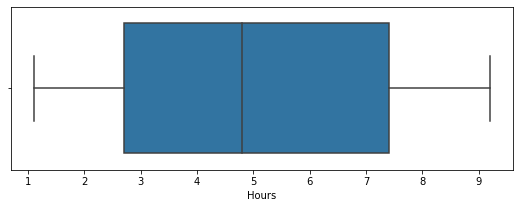

In [1035]:
# Plotting the boxplot to find the outliers if any available in the data.
plt.figure(figsize=(9,3))
sns.boxplot(scores['Hours'])
plt.show()

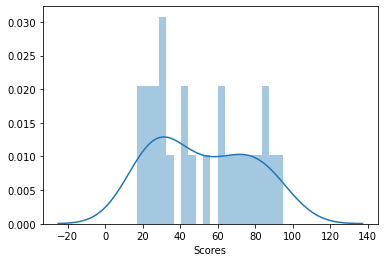

In [1036]:
# Plotting a histogram to find the scores distribution. 
sns.distplot(scores['Scores'], bins=20)
plt.show()

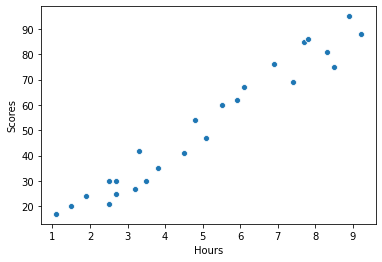

In [1037]:
# Plotting a scatter plot of Hours and Scores
sns.scatterplot(data=scores, x='Hours', y= 'Scores')

In [1038]:
# Performing binning on the hourly data to find the hourwise scores scored by students.
import numpy as np
scores_sorted = scores.copy()
scores_sorted['Hourly_Category'] = np.where(
                                    (scores['Hours']<=2.5),
                                    '0 - 2.5',
                                    np.where((scores['Hours']>2.5) & (scores['Hours']<=5.0),
                                              '2.5 - 5.0',
                                              np.where((scores['Hours']>5.0) & (scores['Hours']<=7.5), '5.0 - 7.5',
                                                       'Above 7.5'
                                                                          )))

In [1039]:
# After binning we have the new Hourly Category column
scores_sorted.head()

,Hours,Scores,Hourly_Category
0,2.5,21,0 - 2.5
1,5.1,47,5.0 - 7.5
2,3.2,27,2.5 - 5.0
3,8.5,75,Above 7.5
4,3.5,30,2.5 - 5.0


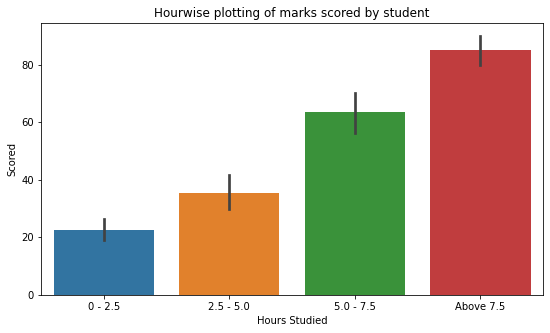

In [1040]:
# Plotting the hour wise scores scored by the students.
scores_sorted = scores_sorted.sort_values(['Hours'])
plt.figure(figsize=(9,5))
plt.title('Hourwise plotting of marks scored by student')
sns.barplot(data=scores_sorted, x='Hourly_Category', y='Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Scored')
plt.show()

In [1041]:
scores.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [1042]:
# Splitting the data into Dependent and Independent features set.
X = scores['Hours'].values.reshape(-1,1)
y = scores['Scores']

In [1043]:
# Splitting the dataset into train and test set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=52)

In [1044]:
# Lets see the shape of train and test data after splitting it using train_test_split
print('X_train shape is:{0}, y_train shape is:{1}, X_test shape is:{2}, y_test shape is:{3}'.format(X_train.shape,y_train.shape, X_test.shape, y_test.shape))

X_train shape is:(20, 1), y_train shape is:(20,), X_test shape is:(5, 1), y_test shape is:(5,)


In [1045]:
# Importing the linear regression 
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [1046]:
# Training the model
lr.fit(X_train,y_train)

LinearRegression()

In [1047]:
# Predicting on the test data
y_pred = lr.predict(X_test)

In [1048]:
# Creating a dataframe with actual and predicted values
prediction_results = pd.DataFrame(data={'Actual':y_test,'Predicted':y_pred})
prediction_results.head()

,Actual,Predicted
7,60,56.144085
9,25,29.013867
18,67,61.957704
14,17,13.510886
4,30,36.765358


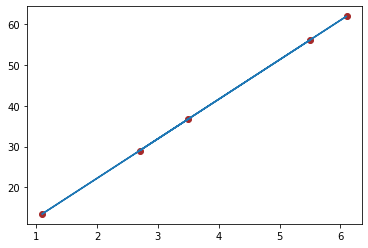

In [1049]:
# Plotting the regression line i.e. y = mx+c

line = lr.coef_*X_test + lr.intercept_

# Plotting for the test data
plt.scatter(X_test, lr.predict(X_test),color = 'brown')
plt.plot(X_test, line);
plt.show()

In [1050]:
# Importing the evaluation metrics to proceed with the model evaluation procedures
from sklearn. metrics import r2_score, mean_squared_error,mean_absolute_error
r_square = r2_score(y_pred, y_test)
mse = mean_squared_error(y_pred, y_test)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_pred, y_test)

In [1051]:
# Let evaluate the model and see the metrics scores.
print('\033[1mR-Squared :\033[0m {0} \n\033[1mMSE :\033[0m {1} \n\033[1mRMSE :\033[0m {2} \n\033[1mMAE :\033[0m {3}'.format(round(r_square,4), round(mse,4), round(rmse,4), round(mae,4)))

R-Squared : 0.9274 
MSE : 22.8696 
RMSE : 4.7822 
MAE : 4.6333


In [1052]:
# Testing with our own data
hours = np.array([9.25]) # No. of hours should be mentioned inside array
hours = hours.reshape(-1,1)
own_pred = lr.predict(hours)
print("No of Hours = {}".format(float(hours)))
print("Predicted Score = {}".format(round(own_pred[0],2)))

No of Hours = 9.25
Predicted Score = 92.48
